In [2]:
# 프로젝트 라이브러리
from thenews.__lib__ import *

# 오픈 패키지
import pandas as pd

# 나의 패키지
import __pymongo as mg

# 프로젝트 라이브러리
from NEWSPJT import *

In [3]:
df = Layout.analyzer.화면배치_위치별_뉴스의_체류시간_분석TBL_파싱로딩()


============================================================find

============================================================위치점유시간_0초_제거
2749
2263


In [4]:
df.head(1)

,뉴스제목,위치점유시간,위치
0,"박근혜 '특활비 1심' 징역형…민주 ""인과응보"" 한국 ""책임 통감""",1667.147,네이버_모바일뉴스_홈:많이본뉴스:4:1:N


In [65]:
#df.sort_values('위치점유시간', ascending=False)
df.groupby('위치').count()


,뉴스제목,위치점유시간
위치,,
네이버_모바일뉴스_홈:많이본뉴스:4:1:N,1,1
네이버_모바일뉴스_홈:많이본뉴스:4:2:N,1,1
네이버_모바일뉴스_홈:많이본뉴스:4:3:N,1,1
네이버_모바일뉴스_홈:많이본뉴스:4:4:N,1,1
네이버_모바일뉴스_홈:많이본뉴스:4:5:N,1,1
네이버_모바일뉴스_홈:많이본뉴스:4:6:N,1,1
네이버_모바일뉴스_홈:많이본뉴스:4:7:N,1,1
네이버_모바일뉴스_홈:많이본뉴스:4:8:N,1,1
네이버_모바일홈:문자형_뉴스리스트:1:1:Y,229,229


In [88]:
# 페이지별로 나누기

df_1  = df[ df['위치'].str.contains(pat='네이버_모바일홈') ]
df_2  = df[ df['위치'].str.contains(pat='네이버_모바일뉴스_홈') ]

In [89]:
len(df_1)

2255

In [90]:
len(df_2)

8

In [91]:
# 특정 위치에 대한 점유시간 계산을 위한 분할

df_12 = df_1[ df_1['위치']=='네이버_모바일홈:문자형_뉴스리스트:1:1:Y' ]
len(df_12)

229

In [92]:
df_12.describe(include=None)

,위치점유시간
count,2.290000e+02
mean,3.881519e+04
std,2.665457e+05
min,2.407200e+02
25%,1.971759e+03
50%,4.078045e+03
75%,6.002445e+03
max,2.603915e+06


In [73]:
li = df_12.describe(include=None).values
new_li = []
for e in li:
    new_li.append(e[0])
new_li

[229.0,
 38815.192786026179,
 266545.69994277798,
 240.72,
 1971.759,
 4078.0450000000001,
 6002.4449999999997,
 2603914.503]

In [93]:
count = new_li[0]
mean = new_li[1]
std = new_li[2]
minm = new_li[3]
maxm = new_li[7]

# 언론_그래프분석용_로딩

In [94]:
def 언론_그래프분석용_로딩(title_li):
    query = {'뉴스제목':{'$in':title_li}}
    projection = {'_id':1, '언론사명':1, '언론인명':1}
    df = mg.find(db명=DB명, tbl명=News.TBL명, query=query, projection=projection, dbg_on=False, 컬럼순서li=[], df보고형태='df')
    
    # 기초청소
    df = df.rename(columns={'_id':'news_id'})
    
    print(len(df))
    return df


In [124]:
# 네이버 모바일홈 에 대해서 : 첫화면-첫줄

title_li = list(df_12['뉴스제목'])
df1 = 언론_그래프분석용_로딩(title_li)
title = '"네이버_모바일홈:문자형_뉴스리스트:1:1:Y" 에 배치된 뉴스들의 언론사별 구성비_파이_EN'



============================================================find
179


In [127]:
# 네이버 모바일홈 에 대해서 : 전부 

title_li = list(df_1['뉴스제목'])
df1 = 언론_그래프분석용_로딩(title_li)
title = '"네이버_모바일홈" 에 배치된 전체 뉴스들의 언론사별 구성비_파이_EN'



============================================================find
1423


In [121]:
df1.head()

,news_id,언론사명,언론인명
0,5b0d22dfb94e314ecfd97576,뉴스1,이유지 기자
1,5b0d58d0b94e314ecfd97e6a,연합뉴스,None
2,5b0d5d83b94e314ecfd97f41,연합뉴스,None
3,5b0e3155b94e314ecfd991db,연합뉴스,강건택 기자
4,5b0e1b78b94e314ecfd9911a,뉴스1,정은지 기자


In [128]:
df1 = Translator.term_translator(df=df1)


============================================================find


In [129]:
df1 = df1.groupby(['Press company name']).count().sort_values('news_id', ascending=False)
df1

,news_id,Jounalist name
Press company name,,
yonhapnews,479,352
news1,176,173
newsis,168,167
news.sbs,133,84
news.jtbc.joins,93,83
imnews.imbc,62,53
chosun,39,0
donga,31,0
nocutnews,26,12


In [100]:
import __matplotlib as mpl

TFM_DATA_PATH = '/Users/sambong/내자료/TFM/data'
CHAPTER = '/뉴스의 화면배치'
SUB_CHAPTER = '/인터넷 포털 언론사(네이버)의 홈페이지 뉴스 화면배치'

{'f_path': '/Users/sambong/내자료/TFM/data/뉴스의 화면배치/인터넷 포털 언론사(네이버)의 홈페이지 뉴스 화면배치/"네이버_모바일홈" 에 배치된 전체 뉴스들의 언론사별 구성비_파이_EN'}


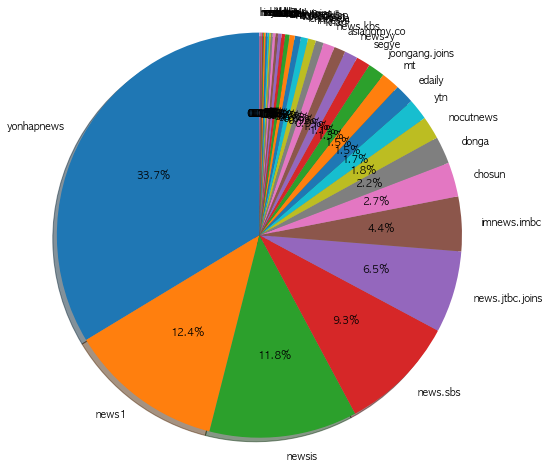

In [119]:


f_path = TFM_DATA_PATH + CHAPTER + SUB_CHAPTER + '/' + title

mpl.pie_graph(labels=list(df1.index), sizes=list(df1['news_id']), save=True, f_path=f_path)